In [6]:
# Run this cell to render a mitosheet
# See mito's documentation here: https://docs.trymito.io/how-to/creating-a-mitosheet
# Join our Discord for support here: https://discord.gg/XdJSZyejJU

# import mitosheet
# mitosheet.sheet(analysis_to_replay="id-cynjfnkiyw")

In [7]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install imblearn
# !pip install sklearnA
# !pip install statsmodels

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt')
df


,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B
245,P,N,N,N,N,N,B
246,A,N,N,N,N,N,B
247,N,N,N,N,N,N,B


In [10]:
import mitosheet
mitosheet.sheet(df, analysis_to_replay="id-qfkdirszak")

MitoWidget(analysis_data_json='{"analysisName": "id-kianvoafot", "analysisToReplay": {"analysisName": "id-qfkd…

In [11]:
df.columns

Index(['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2', 'NB'], dtype='object')

In [12]:
from sklearn.preprocessing import OrdinalEncoder


In [13]:
enc = OrdinalEncoder()
df[['IR','MR','FF','CR','CO','OP','class']] = enc.fit_transform(df[['P','P.1','A','A.1','A.2','P.2','NB']])
df

,P,P.1,A,A.1,A.2,P.2,NB,IR,MR,FF,CR,CO,OP,class
0,N,N,A,A,A,N,NB,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,A,A,A,A,A,A,NB,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,P,P,P,P,P,P,NB,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,N,N,P,P,P,N,NB,1.0,1.0,2.0,2.0,2.0,1.0,1.0
4,A,A,P,P,P,A,NB,0.0,0.0,2.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,N,N,A,N,N,N,B,1.0,1.0,0.0,1.0,1.0,1.0,0.0
245,P,N,N,N,N,N,B,2.0,1.0,1.0,1.0,1.0,1.0,0.0
246,A,N,N,N,N,N,B,0.0,1.0,1.0,1.0,1.0,1.0,0.0
247,N,N,N,N,N,N,B,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [14]:
df = df.drop(columns = ['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2', 'NB'])
df

,IR,MR,FF,CR,CO,OP,class
0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,1.0,1.0,2.0,2.0,2.0,1.0,1.0
4,0.0,0.0,2.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...
244,1.0,1.0,0.0,1.0,1.0,1.0,0.0
245,2.0,1.0,1.0,1.0,1.0,1.0,0.0
246,0.0,1.0,1.0,1.0,1.0,1.0,0.0
247,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [15]:
df.describe()

,IR,MR,FF,CR,CO,OP,class
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.991968,0.967871,0.935743,1.012048,1.144578,1.084337,0.570281
std,0.803179,0.723296,0.721143,0.790477,0.753474,0.732948,0.496033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IR      249 non-null    float64
 1   MR      249 non-null    float64
 2   FF      249 non-null    float64
 3   CR      249 non-null    float64
 4   CO      249 non-null    float64
 5   OP      249 non-null    float64
 6   class   249 non-null    float64
dtypes: float64(7)
memory usage: 13.7 KB


In [17]:
df.isna().sum()

IR       0
MR       0
FF       0
CR       0
CO       0
OP       0
class    0
dtype: int64

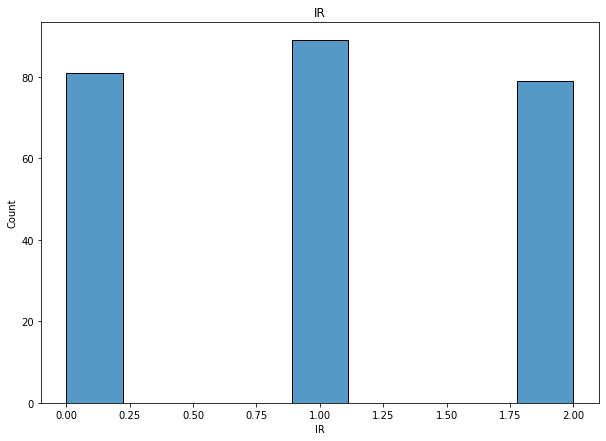

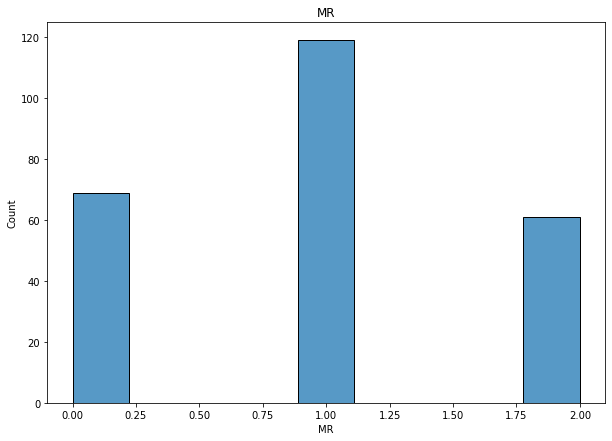

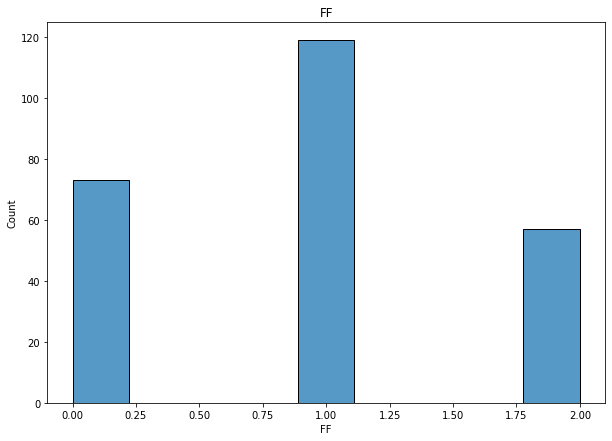

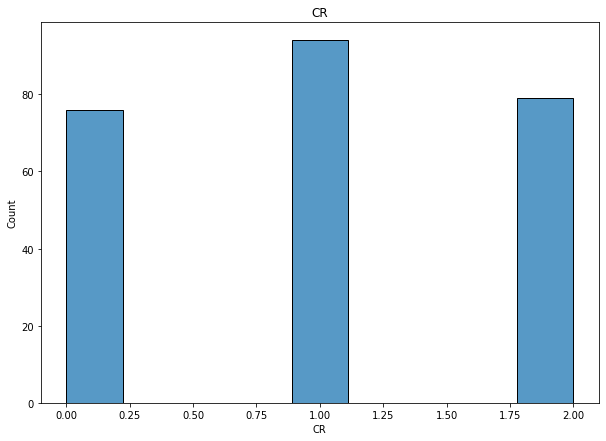

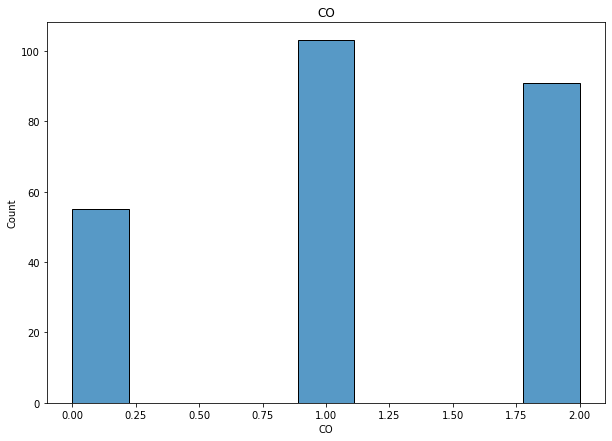

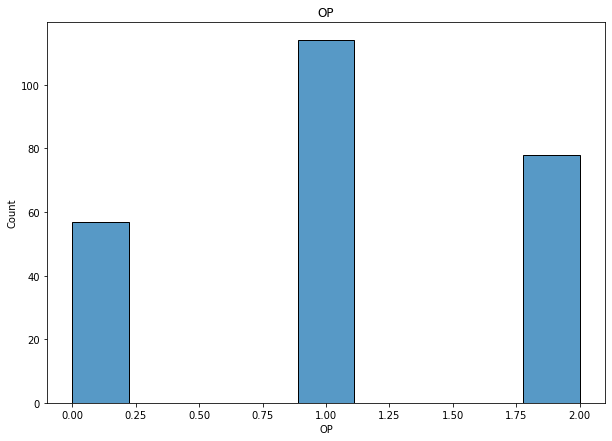

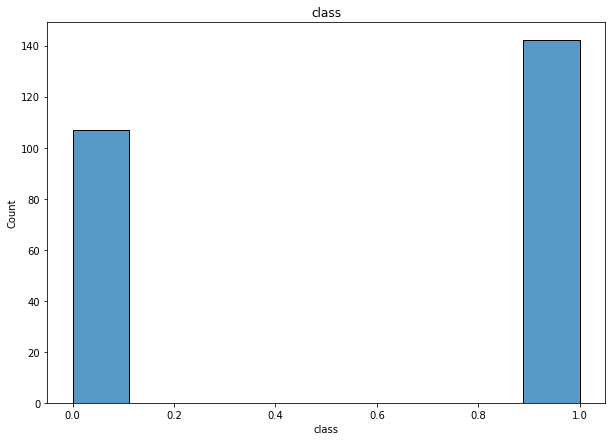

In [18]:
for column in df:
    plt.figure(figsize = (10, 7))
    sns.histplot(data = df, x = column)
    plt.title(column)
    plt.show()

In [19]:
y= df["class"]

In [20]:
X = df.drop(columns = ["class"], axis = 1)
X

,IR,MR,FF,CR,CO,OP
0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,2.0,2.0,2.0
3,1.0,1.0,2.0,2.0,2.0,1.0
4,0.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...
244,1.0,1.0,0.0,1.0,1.0,1.0
245,2.0,1.0,1.0,1.0,1.0,1.0
246,0.0,1.0,1.0,1.0,1.0,1.0
247,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
X.shape

(249, 6)

In [22]:
y.shape

(249,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)

In [25]:
X_vtrain, X_vtest, y_vtrain, y_vtest = train_test_split(X_train, y_train, test_size = 25, random_state = 45)

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

In [27]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow curve')

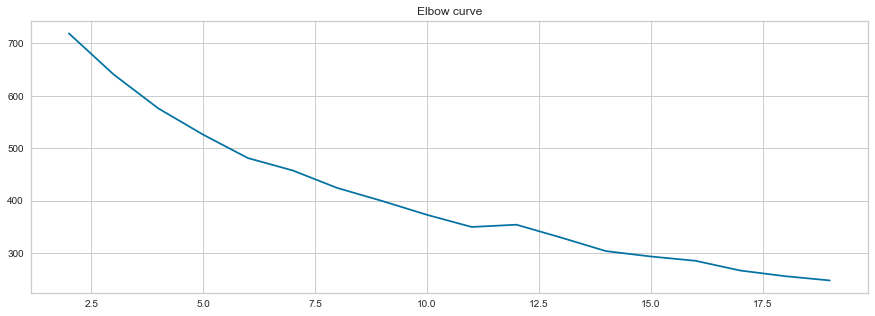

In [28]:
distorsions = []
for ks in range(2, 20):
    kmeans = KMeans(n_clusters=ks)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

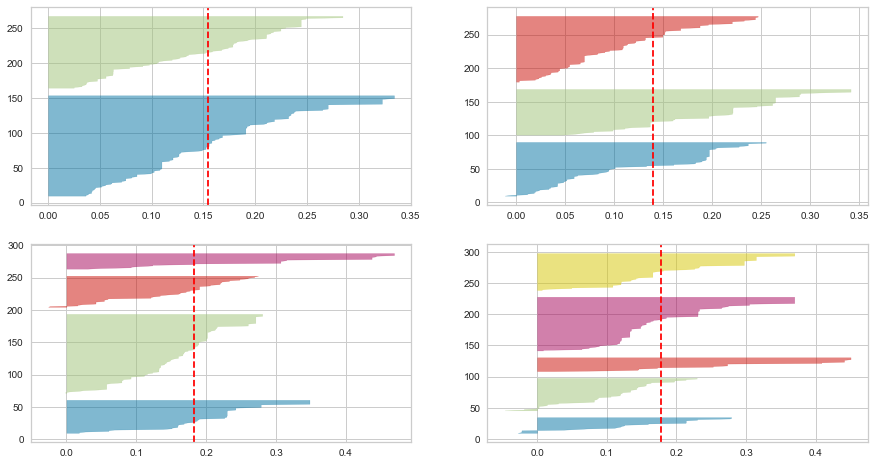

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
neigh = KNeighborsClassifier(n_neighbors=5)
knn = neigh.fit(X_train, y_train)

In [3]:
pip install pickle5

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pickle5, since package 'wheel' is not installed.
  Running setup.py install for pickle5: started
  Running setup.py install for pickle5: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Running setup.py install for pickle5 did not run successfully.
  exit code: 1
  
  [17 lines of output]
  running install
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.10
  creating build\lib.win-amd64-3.10\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-3.10\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-3.10\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-3.10\pickle5
  creating build\lib.win-amd64-3.10\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-3.10\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-3.10\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-3.10\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-3.10\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Micr

In [5]:
import pickle

In [6]:
pickle.dump(neigh, open('model.pkl', 'wb'))

NameError: name 'neigh' is not defined

In [32]:
neigh.score(X_train, y_train)

0.9698492462311558

In [33]:
y_pred = neigh.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[20,  0],
       [ 5, 25]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        20
         1.0       1.00      0.83      0.91        30

    accuracy                           0.90        50
   macro avg       0.90      0.92      0.90        50
weighted avg       0.92      0.90      0.90        50

